Proyecto Integrador P65

Materias: Aprendizaje automático y visión por computadora.

Integrantes: Zelena Jiménez, Sara Quiguango, Cristian Naranjo, Leandro Lara


Modelo utilizados

SVM

In [110]:
#Librerias
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Ruta al archivo CSV (asegúrate de cambiar esto a la ubicación correcta de tu archivo)
file_path = '/content/archivo_limpio.csv'
# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, delimiter=';')

def svm_model(df, ker="linear",c=1.0, gmm=0.01,kf=5):
  # Dividir el conjunto de datos en características (X) y etiquetas (y)
  X1 = df.iloc[:, :-1]  # Seleccionar todas las filas menos la última columna para X
  y = df.iloc[:, -1]  # Seleccionar la última columna completa para y

  # Convertir todas las columnas a tipo categórico
  X_initial = X1.astype('category')

  # Transformar este subconjunto a variables dummy
  X_dummies = pd.get_dummies(X_initial)

  #print(X_dummies.dtypes)

  # Imprimir el dataset transformado para comprobar
  #print("Dataset transformado:")
  #print(X_dummies.head())  # Imprime las primeras 5 filas

  # Normalizar las características para mejorar el rendimiento del SVM
  scaler = StandardScaler()
  X = scaler.fit_transform(X_dummies)

  # Inicializar StratifiedKFold
  skf = StratifiedKFold(n_splits=kf, shuffle=True, random_state=42)

  # Almacenar las predicciones y etiquetas reales para el cálculo de la precisión final
  all_y_test, all_y_pred = [], []
  accuracies = []
  k = 1
  # Realizar la validación cruzada
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear un clasificador SVM multiclase
      svm_classifier = SVC(kernel=ker, C=c, gamma = gmm,decision_function_shape='ovr', random_state=5)
      # Entrenar el clasificador SVM
      svm_classifier.fit(X_train, y_train)

      # Realizar predicciones en el conjunto de prueba
      y_pred = svm_classifier.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      print(f'Precisión del modelo {k}: {accuracy * 100:.2f}%')
      k+=1
      # Almacenar las predicciones y etiquetas reales
      all_y_test.append(y_test)
      all_y_pred.append(y_pred)
      accuracies.append(accuracy)

  print(f'Precisión media del modelo de SVM: {np.mean(accuracies) * 100:.2f}%')
  print(f'Desviación estándar de la precisión: {np.std(accuracies) * 100:.2f}%')
  return all_y_test, all_y_pred

#Se calcula linear dado a que se obtiene una menor desviación estandar
all_y_testsvm, all_y_predsvm = svm_model(df,'linear',1.0, 0.01, 10)
# Calcular la precisión del modelo en conjunto de prueba con mejor precisión
accuracy = accuracy_score(all_y_testsvm[4], all_y_predsvm[4])
print(f'\nPrecisión del mejor clasificador SVM con k-fold: {accuracy * 100:.2f}%')

# Calcular y mostrar métricas de clasificación
print("Reporte de clasificación: \n", classification_report(all_y_testsvm[4], all_y_predsvm[4]))

Precisión del modelo 1: 65.38%
Precisión del modelo 2: 55.77%
Precisión del modelo 3: 75.00%
Precisión del modelo 4: 69.23%
Precisión del modelo 5: 76.92%
Precisión del modelo 6: 65.38%
Precisión del modelo 7: 69.23%
Precisión del modelo 8: 66.67%
Precisión del modelo 9: 66.67%
Precisión del modelo 10: 60.78%
Precisión media del modelo de SVM: 67.10%
Desviación estándar de la precisión: 5.85%

Precisión del mejor clasificador SVM con k-fold: 76.92%
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.75      0.81      0.78        26

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



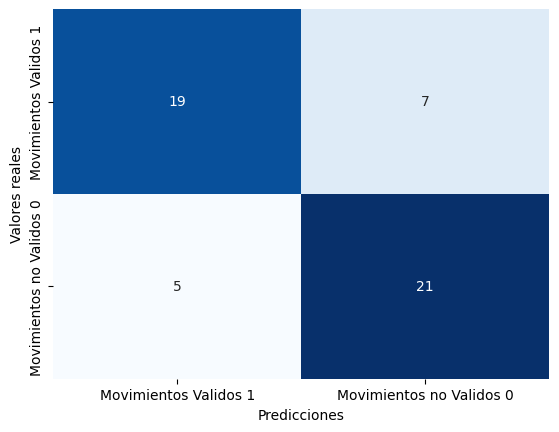

In [111]:
#Matriz de confusión - funcion
import matplotlib.pyplot as plt
import seaborn as sns
def matriz_conf(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  class_labels = ['Movimientos Validos 1', 'Movimientos no Validos 0']

  # Visualiza la matriz de confusión con seaborn
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel("Predicciones")
  plt.ylabel("Valores reales")
  plt.show()
matriz_conf(all_y_testsvm[4], all_y_predsvm[4])

Redes Neuronales Aritificiales

2/2 [==============================] - 0s 10ms/step
Precisión del modelo 1: 61.54%
2/2 [==============================] - 0s 19ms/step
Precisión del modelo 2: 80.77%
2/2 [==============================] - 0s 6ms/step
Precisión del modelo 3: 76.92%
2/2 [==============================] - 0s 4ms/step
Precisión del modelo 4: 73.08%
2/2 [==============================] - 0s 6ms/step
Precisión del modelo 5: 59.62%
2/2 [==============================] - 0s 6ms/step
Precisión del modelo 6: 71.15%
2/2 [==============================] - 0s 8ms/step
Precisión del modelo 7: 75.00%
2/2 [==============================] - 0s 6ms/step
Precisión del modelo 8: 70.59%
2/2 [==============================] - 0s 6ms/step
Precisión del modelo 9: 76.47%
2/2 [==============================] - 0s 5ms/step
Precisión del modelo 10: 60.78%

Precisión del mejor clasificador Neural Network con k-fold: 80.77%
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.80   

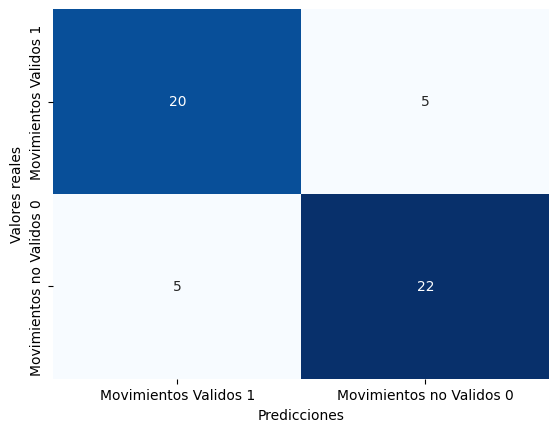

In [122]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Ruta al archivo CSV (asegúrate de cambiar esto a la ubicación correcta de tu archivo)
file_path = '/content/archivo_limpio.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, delimiter=';')

def ann_model(df, n_splits=5, epochs=30, batch_size=64):
    # Dividir el conjunto de datos en características (X) y etiquetas (y)
    y = df['VALIDEZ']  # Selecciona la columna 'VALIDEZ' como etiquetas
    X1 = df.drop(columns=['VALIDEZ'])  # Usa todas las demás columnas como características

    # Convertir todas las columnas a tipo categórico
    X_initial = X1.astype('category')

    # Transformar este subconjunto a variables dummy
    X_dummies = pd.get_dummies(X_initial)

    # Convertir etiquetas a números usando LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Normalizar las características para mejorar el rendimiento de la red neuronal
    scaler = StandardScaler()
    X = scaler.fit_transform(X_dummies)

    # Inicializar StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=5)

    # Almacenar las predicciones y etiquetas reales para el cálculo de la precisión final
    best_accuracy = 0
    best_model = None
    best_y_test = None
    best_y_pred = None

    # Realizar la validación cruzada
    for k, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Inicializar el modelo dentro del bucle k-fold
        model = keras.Sequential([
            layers.Dense(60, activation='relu', input_dim=X.shape[1]), # Capa de entrada y primera capa densa de la red neuronal
            layers.Dense(30, activation='relu'),
            layers.Dense(np.unique(y).size, activation='softmax')  # Número de neuronas igual al número de clases
        ])

        # Compilar el modelo
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Entrenar el modelo
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Realizar predicciones en el conjunto de prueba
        y_pred_probabilities = model.predict(X_test)
        y_pred = y_pred_probabilities.argmax(axis=1)

        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Precisión del modelo {k}: {accuracy * 100:.2f}%')

        # Si la precisión actual es la mejor, guardar el modelo
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_y_test = y_test
            best_y_pred = y_pred

    print(f'\nPrecisión del mejor clasificador Neural Network con k-fold: {best_accuracy * 100:.2f}%')

    # Calcular y mostrar métricas de clasificación
    print("Reporte de clasificación: \n", classification_report(best_y_test, best_y_pred))
    matriz_conf(best_y_test, best_y_pred)

    return best_y_test, best_y_pred

# Aplicar el algoritmo de Red Neuronal con validación cruzada K-Fold
y_test_ann, y_pred_ann = ann_model(df, n_splits=10, epochs=30, batch_size=64)


Precisión del modelo 1: 73.08%
Precisión del modelo 2: 67.31%
Precisión del modelo 3: 78.85%
Precisión del modelo 4: 67.31%
Precisión del modelo 5: 76.92%
Precisión del modelo 6: 61.54%
Precisión del modelo 7: 76.92%
Precisión del modelo 8: 74.51%
Precisión del modelo 9: 74.51%
Precisión del modelo 10: 70.59%
Precisión media del modelo de Random Forest: 72.15%
Desviación estándar de la precisión: 5.14%

Precisión del mejor clasificador Random Forest con k-fold: 78.85%
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.83      0.74      0.78        27

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



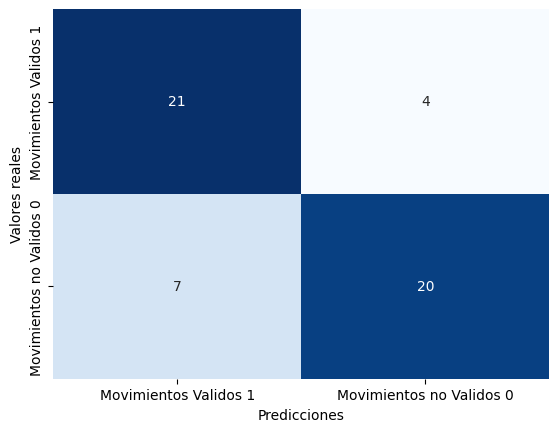

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ruta al archivo CSV (asegúrate de cambiar esto a la ubicación correcta de tu archivo)
file_path = '/content/archivo_limpio.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, delimiter=';')

def randomForest_model(df,kf=5):
  # Dividir el conjunto de datos en características (X) y etiquetas (y)
  y = df['VALIDEZ']  # Selecciona la columna 'VALIDEZ' como etiquetas
  X1 = df.drop(columns=['VALIDEZ'])  # Usa todas las demás columnas como características

  # Convertir todas las columnas a tipo categórico
  X_initial = X1.astype('category')

  # Transformar este subconjunto a variables dummy
  X_dummies = pd.get_dummies(X_initial)
  #print(X_dummies.dtypes)

  # Imprimir el dataset transformado para comprobar
  #print("Dataset transformado:")
  #print(X_dummies.head())  # Imprime las primeras 5 filas

  # Normalizar las características para mejorar el rendimiento del Random Forest
  scaler = StandardScaler()
  X = scaler.fit_transform(X_dummies)

  # Inicializar StratifiedKFold
  skf = StratifiedKFold(n_splits=kf, shuffle=True, random_state=42)

  # Almacenar las predicciones y etiquetas reales para el cálculo de la precisión final
  all_y_test, all_y_pred = [], []
  accuracies = []
  k=1
  # Realizar la validación cruzada
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # Crear un clasificador Random Forest
      random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=5)

      # Entrenar el clasificador Random Forest
      random_forest_classifier.fit(X_train, y_train)

      # Realizar predicciones en el conjunto de prueba
      y_pred = random_forest_classifier.predict(X_test)
      # Calcular la precisión del modelo
      accuracy = accuracy_score(y_test, y_pred)
      print(f'Precisión del modelo {k}: {accuracy * 100:.2f}%')
      k+=1
      # Almacenar las predicciones y etiquetas reales
      all_y_test.append(y_test)
      all_y_pred.append(y_pred)
      accuracies.append(accuracy)

  # Calcular la precisión del modelo en conjunto de prueba combinado
  print(f'Precisión media del modelo de Random Forest: {np.mean(accuracies) * 100:.2f}%')
  print(f'Desviación estándar de la precisión: {np.std(accuracies) * 100:.2f}%')
  return all_y_test, all_y_pred

y_test_rf, y_pred_rf = randomForest_model(df,10)
accuracy = accuracy_score(y_test_rf[2], y_pred_rf[2])
print(f'\nPrecisión del mejor clasificador Random Forest con k-fold: {accuracy * 100:.2f}%')

# Calcular y mostrar métricas de clasificación
print("Reporte de clasificación: \n", classification_report(y_test_rf[2], y_pred_rf[2]))

#Matriz
matriz_conf(y_test_rf[2], y_pred_rf[2])